# 🛠️ Setup & Data Preparation

## 📚 Importing Libraries

In [91]:
# 📦 Data Handling
import pandas as pd
import numpy as np

In [92]:
# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# ⚖️ Scaling / Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from scipy.stats import zscore

In [94]:
# 🔍 Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [95]:
# 🧪 Model Evaluation & Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

In [96]:
# 🧰 Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

## 📄 Reading Data (Pandas)

In [97]:
# 📂 Load Data (CSV / Excel / SQL / JSON)
df_carData = pd.read_csv(r"car_data.csv")  # or read_excel(...), read_sql(...), read_json(...), use delimiter='\t' for TSV

In [98]:
# 👀 Preview data
display(df_carData.head())  # shows first 5 rows in Jupyter; use .head() for CLI

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [99]:
new_car = pd.DataFrame([{
    "Car_Name": 'Zeldean',
    "Year": 2025,
    "Selling_Price": 12.84,
    "Present_Price": 16.43,
    "Kms_Driven": 5874,
    "Fuel_Type": 'CNG',
    "Seller_Type": 'Dealer',
    "Transmission": 'Automatic',
    "Owner": 0
}])

df_nc_clas = new_car.drop(columns="Transmission")
df_nc_regg = new_car.drop(columns="Selling_Price")

# 📊 Data Exploration & Cleaning

## 🧾 Summary & Structure

In [100]:
# 📏 Basic Dataset Dimensions
display(df_carData.shape)      # (rows, columns) — useful for understanding dataset size
# Alternatively: print(f"Rows: {df_carData.shape[0]}, Columns: {df_carData.shape[1]}")

(301, 9)

In [101]:
# 🎯 Random Sample of Rows
display(df_carData.sample(5))  # Random 5-row sample — quick data sanity check

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
140,Honda CBR 150,2013,0.60,1.20,32000,Petrol,Individual,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
56,etios cross,2015,4.50,7.27,40534,Petrol,Dealer,Manual,0
240,verna,2012,5.35,9.40,32322,Diesel,Dealer,Manual,0
111,Royal Enfield Thunder 350,2016,1.15,1.50,8700,Petrol,Individual,Manual,0


In [102]:
# 🎯 Feature Division: Numerical, Categorical, and Target
x_Num = ['Year', 'Present_Price', 'Kms_Driven']
x_Cat = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
y = ['Selling_Price']

In [103]:
# 📊 Statistical Summary (only numeric columns)
display(df_carData.describe())  # Mean, std, min, max, etc. for numeric features

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [104]:
# 🧱 Data Types & Null Counts
display(df_carData.info())      # Shows types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


None

## 📌 Data Selection & Access

In [105]:
# 🎯 Access a Single Column (by name)
display(df_carData['Year'].head())  # First 5 values from the 'Year' column
# Alternative: df_carData.Year.head() — only works if column name has no spaces

0    2014
1    2013
2    2017
3    2011
4    2014
Name: Year, dtype: int64

In [106]:
# 🔍 Access a specific row-column value (Label-based)
print(df_carData.loc[10, 'Year'])  # Value at row index 10, column 'Year'

2017


In [107]:
# 🔽 Access a full row (Position-based)
display(df_carData.iloc[10])       # Full row at index 10 (11th row in dataset)

Car_Name         alto 800
Year                 2017
Selling_Price        2.85
Present_Price         3.6
Kms_Driven           2135
Fuel_Type          Petrol
Seller_Type        Dealer
Transmission       Manual
Owner                   0
Name: 10, dtype: object

In [108]:
# 🔁 Slice rows by position
display(df_carData.iloc[10:20])    # Rows 10 to 19 (uses position index)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0
12,ciaz,2015,7.50,9.94,15000,Petrol,Dealer,Automatic,0
13,ertiga,2015,6.10,7.71,26000,Petrol,Dealer,Manual,0
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0


In [109]:
# 🔂 Slice rows with steps
display(df_carData.iloc[10:20:2])  # Every second row from index 10 to 19

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
10,alto 800,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
12,ciaz,2015,7.50,9.94,15000,Petrol,Dealer,Automatic,0
14,dzire,2009,2.25,7.21,77427,Petrol,Dealer,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0


In [110]:
# 🧭 Slice rows by position + specific column by label
display(df_carData.iloc[10:20].loc[:, 'Year'])  # Access 'Year' column for rows 10–19

10    2017
11    2015
12    2015
13    2015
14    2009
15    2016
16    2015
17    2016
18    2015
19    2010
Name: Year, dtype: int64

In [111]:
# 📚 Access multiple specific columns (Label-based)
display(df_carData.loc[10:15, ['Year', 'Fuel_Type']])  # 'Year' & 'Fuel_Type' from row 10 to 15

,Year,Fuel_Type
10,2017,Petrol
11,2015,Diesel
12,2015,Petrol
13,2015,Petrol
14,2009,Petrol
15,2016,Diesel


## 🔍 Skewness & Distributions

In [112]:
# dataFrames
df_xNum = df_carData[x_Num]
df_xCat = df_carData[x_Cat]
df_y = df_carData[y]

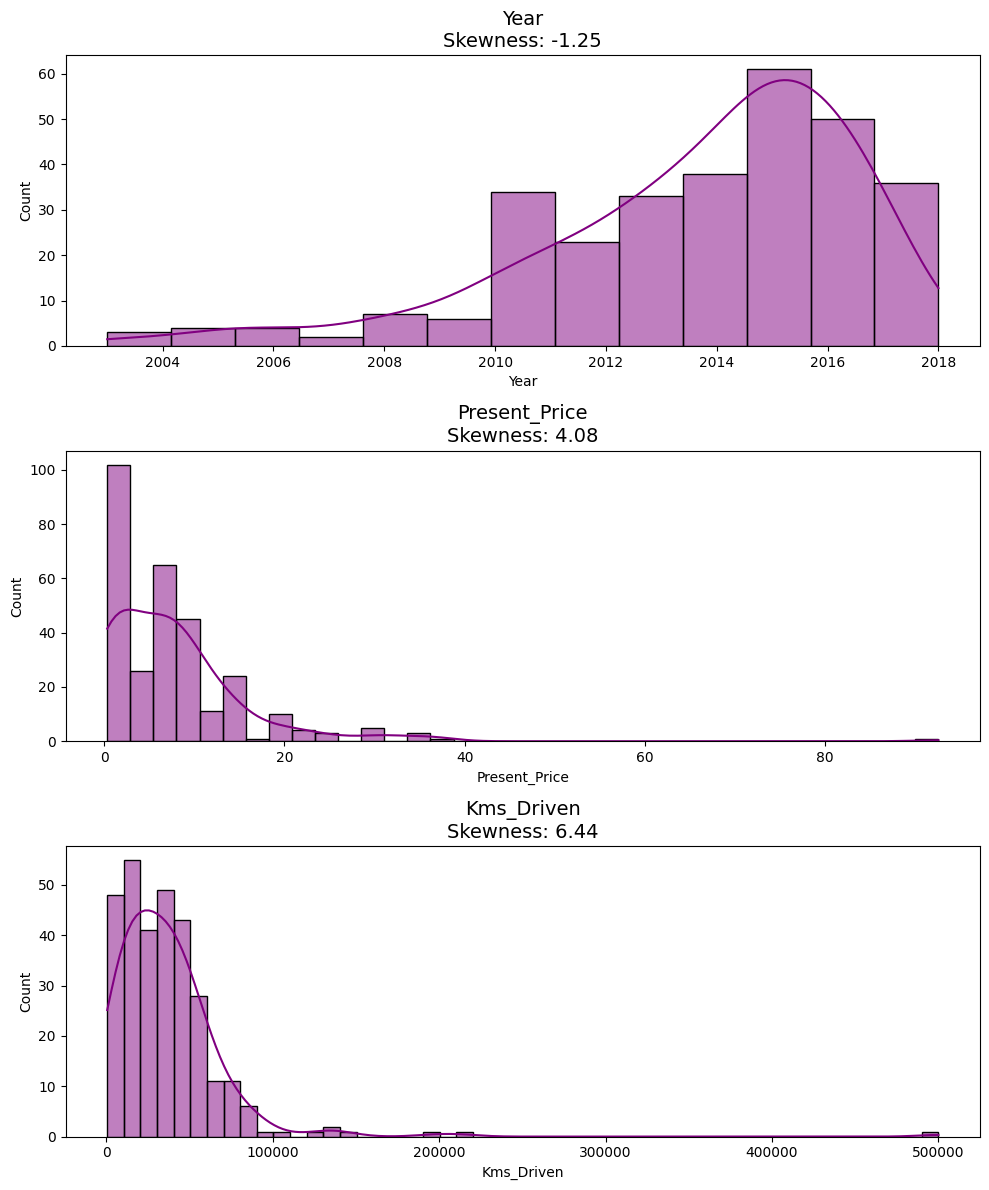

In [ ]:
## 🔍 Skewness & Distributions
# 📊 Visualize distribution + skewness for each numerical feature
def SkewGraph(df):
    plt.figure(figsize=(10, 12))  # Adjusted for better compact spacing
    for i, col in enumerate(df_xNum.columns):
        skew_val = df[col].skew()
        plt.subplot(len(df_xNum.columns), 1, i + 1)
        sns.histplot(df[col], kde=True, color='purple')
        plt.title(f"{col}\nSkewness: {skew_val:.2f}", fontsize=14)
    plt.tight_layout()  # 📐 Fix overlapping labels/layout
    plt.show()

SkewGraph(df_xNum)


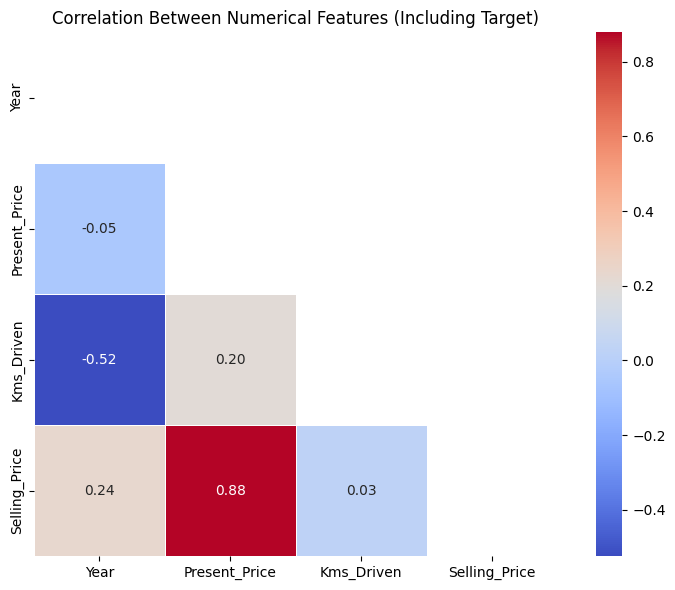

In [114]:
# 🔥 Correlation Heatmap (numeric features + target)

# 🧱 Combine numerical features with target
corr_data = df_xNum.copy()
corr_data['Selling_Price'] = df_y  # Add the target to the DataFrame for correlation check

# 📊 Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data.corr(), mask=np.triu(corr_data.corr()), annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
# Alternatives:
# - cmap='YlGnBu', 'viridis', 'magma', etc.
# - annot_kws={'size': 10} to change font size
# - linewidths=0.5 for cell borders
# - mask=np.triu(corr_data.corr()) to hide the upper triangle

plt.title("Correlation Between Numerical Features (Including Target)")
plt.tight_layout()
plt.show()


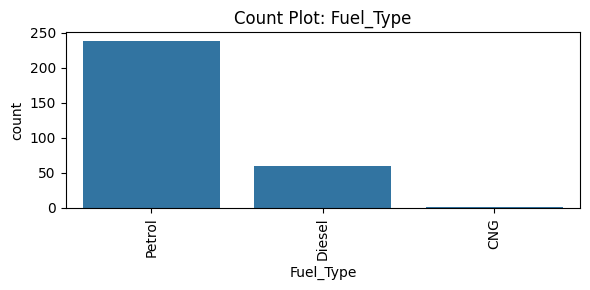

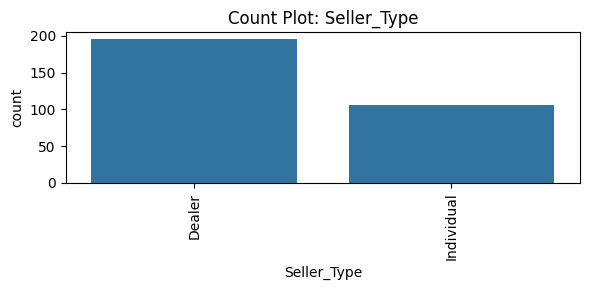

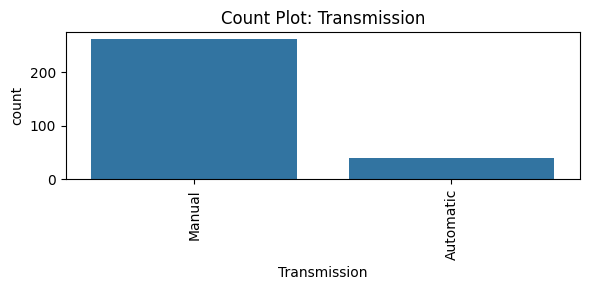

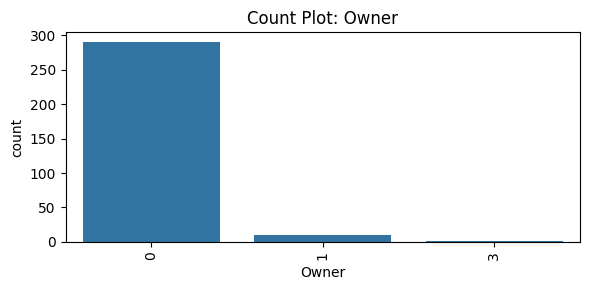

In [115]:
# 📊 Count plots for categorical features
for col in df_xCat.columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df_carData, x=col)
    # Alternatives:
    # - hue='AnotherCol' to break counts by subgroup
    # - order=df_carData[col].value_counts().index to sort bars
    # - palette='pastel' for different color schemes

    plt.title(f"Count Plot: {col}")
    plt.xticks(rotation=90)  # Alternatives: 45 for angled, 0 for horizontal
    # To relabel categories:
    # plt.xticks(ticks=[0,1,2], labels=['Petrol','Diesel','CNG'])

    plt.tight_layout()
    plt.show()


## 🚫 Handling Missing Values

In [116]:
# 🔍 Detect Missing Values
missing_counts = df_carData.isnull().sum()
missing_perc = df_carData.isnull().mean() * 100

display(pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_perc.round(2)
}))


,Missing Count,Missing %
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Kms_Driven,0,0.0
Fuel_Type,0,0.0
Seller_Type,0,0.0
Transmission,0,0.0
Owner,0,0.0


In [117]:
# 👀 View rows with any missing values
if (missing_counts.any()):
    df_carData[df_carData.isnull().any(axis=1)]
    # Alternatives:
    # df_carData[df_carData['ColumnName'].isnull()] to target a specific column
else:
    print("No Missing Data")

No Missing Data


In [118]:
# 🛠️ Example: Impute with median (recommended for skewed numeric data)
df_carData['Kms_Driven'] = df_carData['Kms_Driven'].fillna(df_carData['Kms_Driven'].median())

# 🧪 Impute with mode (for categorical data)
df_carData['Fuel_Type'] = df_carData['Fuel_Type'].fillna(df_carData['Fuel_Type'].mode()[0])

# 🧪 Impute with mean (only for normally distributed data)
# df_carData['Present_Price'] = df_carData['Present_Price'].fillna(df_carData['Present_Price'].mean())

# ✂️ Drop rows or columns with too many missing values (use cautiously)
# df_carData.dropna(inplace=True)
# df_carData.drop(columns=['Unwanted_Column'], inplace=True)


## 📌 Removing Duplicates


In [119]:
# 🔁 Check for fully duplicated rows (across all columns)
duplicates = df_carData.duplicated()  # default: keep='first'
# Alternative: df_carData.duplicated(keep=False) to mark all occurrences as duplicates

print(f"🧾 Number of fully duplicated rows (excluding the first occurrence): {duplicates.sum()}")

# 🔍 Display some of the duplicates
display(df_carData[duplicates].sort_values('Car_Name').head(10))

# ✅ To view all instances of duplication (including the first copy)
# full_duplicates = df_carData[df_carData.duplicated(keep=False)]

# ✂️ To remove duplicate rows (keeps first by default)
# df_carData = df_carData.drop_duplicates()


🧾 Number of fully duplicated rows (excluding the first occurrence): 2


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


## 📈 Visualizing Patterns


# 🔄 Feature Engineering

In [120]:
df_active = df_carData.copy()
df_active.drop(columns='Car_Name', inplace=True)
df_active.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 🛠️ Encoding Categorical Features

In [121]:
# 🧱 Encode selected categorical features (excluding 'Owner' which is already numeric)
# One-hot encode: creates binary columns for each category
df_encouded_xCat = pd.get_dummies(df_active[x_Cat].drop('Owner', axis=1), drop_first=False).astype(int)
# Alternatives:
# - drop_first=False → keeps all categories (can cause multicollinearity)
# - prefix=... → sets column name prefix
# - dtype=int → ensures output is numeric for models

# ➕ Combine numerical + encoded categorical features
df_encouded = pd.concat([df_active, df_encouded_xCat], axis=1)

# 🧹 Drop original categorical columns (replaced by encoded versions)
df_encouded.drop(columns=['Fuel_Type', 'Seller_Type', 'Transmission'], inplace=True)

# 🧪 Preview the final dataframe
df_encouded.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


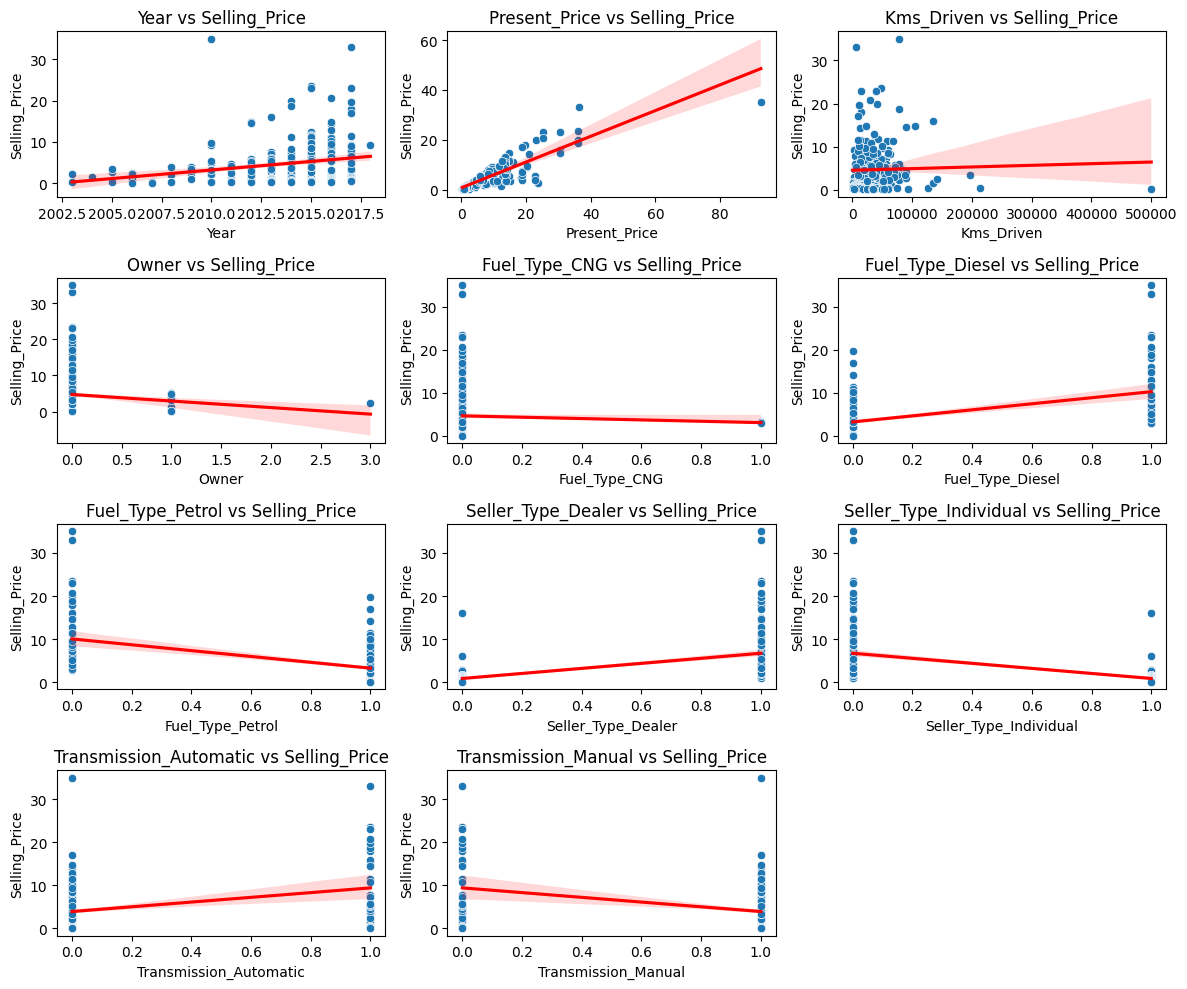

In [122]:
plt.figure(figsize=(12, 10))

# Loop through all input features (excluding target)
for i, col in enumerate(df_encouded.drop(columns='Selling_Price').columns):
    plt.subplot(4, 3, i + 1)  # Grid layout: 4 rows x 3 columns (adjust as needed)

    # 📍 Scatterplot: shows data points
    sns.scatterplot(data=df_encouded, x=col, y='Selling_Price')
    # Alternatives:
    # - hue='Fuel_Type_Diesel' → color by a feature
    # - style='Transmission_Manual' → add marker shape differences
    # -  alpha=0.6

    # 📈 Regression line: shows trend
    sns.regplot(data=df_encouded, x=col, y='Selling_Price', scatter=False, color='red')
    # Alternatives:
    # - scatter=True → show both line and dots
    # - order=2 → plot a polynomial regression curve

    plt.title(f"{col} vs Selling_Price")

plt.tight_layout()  # 📐 Prevent subplot overlap
plt.show()


## ⚖️ Feature Scaling

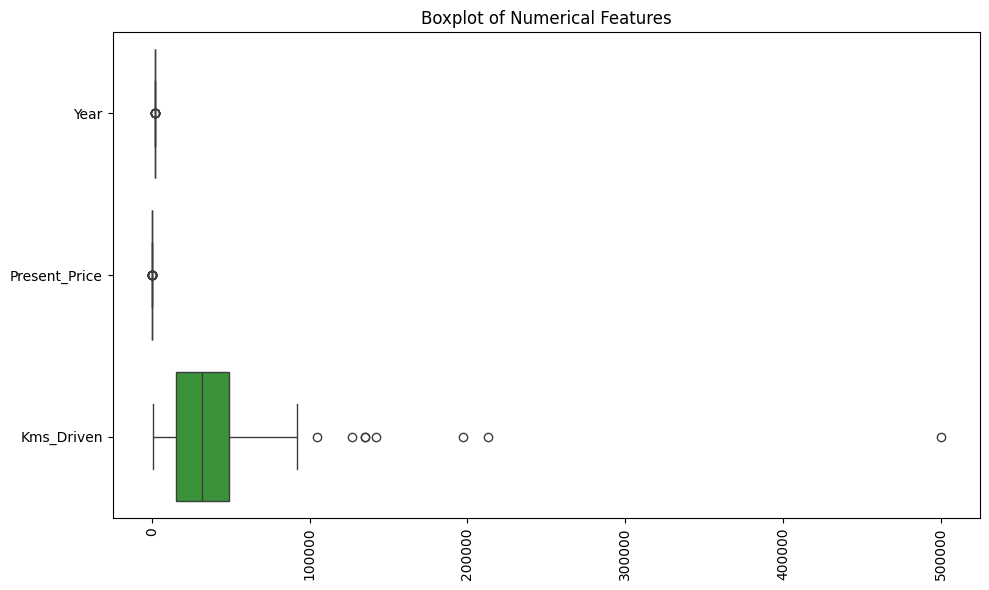

In [123]:
# 📦 Boxplot for numeric features (detect spread, skew, and outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_xNum, orient='h')  # 'v' for vertical (default), use orient='h' for horizontal
# Alternative: hue='some_categorical_column' to split boxes by category
# Alternative: palette='Set2' or any seaborn palette name for color scheme

plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)  # Rotate labels for readability (use 45 for diagonal)
# Alternative: plt.xticks(ticks=[0,1,2], labels=['A','B','C']) to customize labels manually

plt.tight_layout()
plt.show()

## 🧪 Train-Test Split

In [124]:
# from sklearn.model_selection import train_test_split

# Split the features and target
df_x = df_encouded.drop(columns='Selling_Price')
df_y = df_encouded['Selling_Price']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# 🧪 Preview the shape of each set
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (240, 11), X_test: (61, 11)
y_train: (240,), y_test: (61,)


# 🤖 Model Training

## 📈 Linear Regression

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

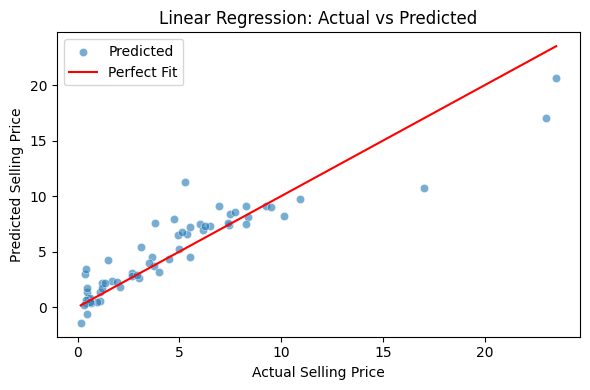

Linear Regression Metrics:
R² Score: 0.8489813024896058
MAE: 1.216225682130144
MSE: 3.4788039706448317


In [126]:
# 🔹 Fit Linear Regression model
modelLR = LinearRegression()  # Optional: fit_intercept=True, positive=True
LRM = modelLR.fit(X_train, y_train)  # You can also skip assignment and call predict on modelLR directly
y_pred = LRM.predict(X_test)         # Predict using the fitted model

# 📊 Visualize predicted vs actual values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, label='Predicted', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')  # Ideal case: y = x
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.legend()
plt.tight_layout()
plt.show()

# 📏 Evaluate model performance
print("Linear Regression Metrics:")
print("R² Score:", r2_score(y_test, y_pred))                # Closer to 1 = better fit
print("MAE:", mean_absolute_error(y_test, y_pred))          # Average absolute error
print("MSE:", mean_squared_error(y_test, y_pred))           # Average squared error
# Optional: print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


In [127]:
# Feature impact (weights)
print("Intercept:", modelLR.intercept_)
print("Coefficients:")
for col, coef in zip(X_train.columns, modelLR.coef_):
    print(f"{col}: {coef:.4f}")


Intercept: -710.2771513359723
Coefficients:
Year: 0.3538
Present_Price: 0.4292
Kms_Driven: -0.0000
Owner: -0.9038
Fuel_Type_CNG: -1.0906
Fuel_Type_Diesel: 1.4427
Fuel_Type_Petrol: -0.3521
Seller_Type_Dealer: 0.5953
Seller_Type_Individual: -0.5953
Transmission_Automatic: 0.8195
Transmission_Manual: -0.8195


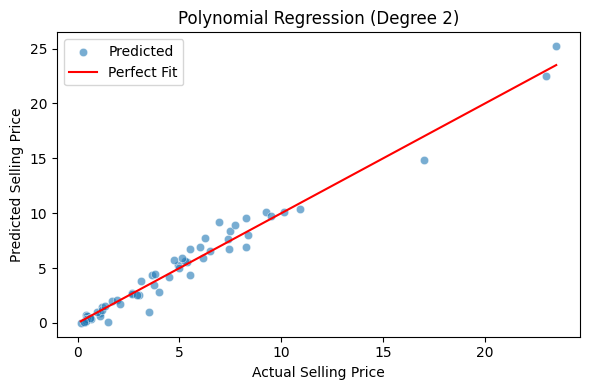

Polynomial Regression Metrics:
R² Score: 0.9712024862244617
MAE: 0.5698017462849241
MSE: 0.6633675625506357


In [128]:
# 🔸 Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)  # include_bias=False avoids extra constant column
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Always transform test data with same fitted transformer

# 🔸 Fit Linear Regression on polynomial features
PLR = modelLR.fit(X_train_poly, y_train)  # Reuse modelLR or create new: modelPoly = LinearRegression()
y_polyPred = PLR.predict(X_test_poly)

# 📊 Visualize polynomial regression results
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_polyPred, label='Predicted', alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.legend()
plt.tight_layout()
plt.show()

# 📏 Evaluate polynomial model performance
print("Polynomial Regression Metrics:")
print("R² Score:", r2_score(y_test, y_polyPred))           # Better than linear? Depends on data!
print("MAE:", mean_absolute_error(y_test, y_polyPred))
print("MSE:", mean_squared_error(y_test, y_polyPred))


## 🌲 Decision Trees

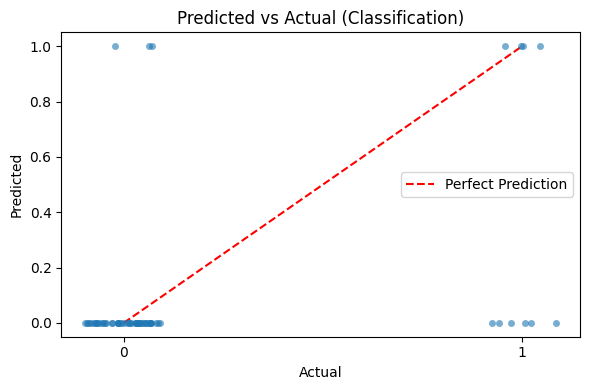

The model is: 85.25% Accurate.
[[48  3]
 [ 6  4]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        51
           1       0.57      0.40      0.47        10

    accuracy                           0.85        61
   macro avg       0.73      0.67      0.69        61
weighted avg       0.84      0.85      0.84        61



In [129]:
# 🎯 Classification target: Transmission (Manual=0, Automatic=1)
target_col = 'Transmission'
y = df_active[target_col].map({'Manual': 0, 'Automatic': 1})

# 🧪 Drop one-hot-encoded Transmission columns from input
X = df_encouded.drop(columns=['Transmission_Manual', 'Transmission_Automatic'])

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train Decision Tree Classifier
model_dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
model_dtc.fit(X_train, y_train)

# 🔮 Predict
y_dtc_pred = model_dtc.predict(X_test)

# 📊 Plot Prediction vs Actual
plt.figure(figsize=(6, 4))
sns.stripplot(x=y_test, y=y_dtc_pred, jitter=True, alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual (Classification)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.show()

# 🧾 Evaluation
accScore = accuracy_score(y_test, y_dtc_pred)
print(f"The model is: {accScore:0.2%} Accurate.")

# Optional:
print(confusion_matrix(y_test, y_dtc_pred))
print(classification_report(y_test, y_dtc_pred))


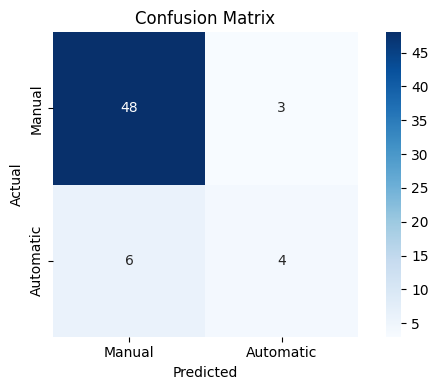

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 👇 Replace with your actual values
cm = confusion_matrix(y_test, y_dtc_pred)

# Optional: define class labels
labels = ['Manual', 'Automatic']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    square=True
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 🏗️ Train a decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

# 🔮 Predict
y_pred = tree_reg.predict(X_test)

# 📏 Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.06477907845231357
MAE: 0.17531704299412312
MSE: 0.1281813141599893


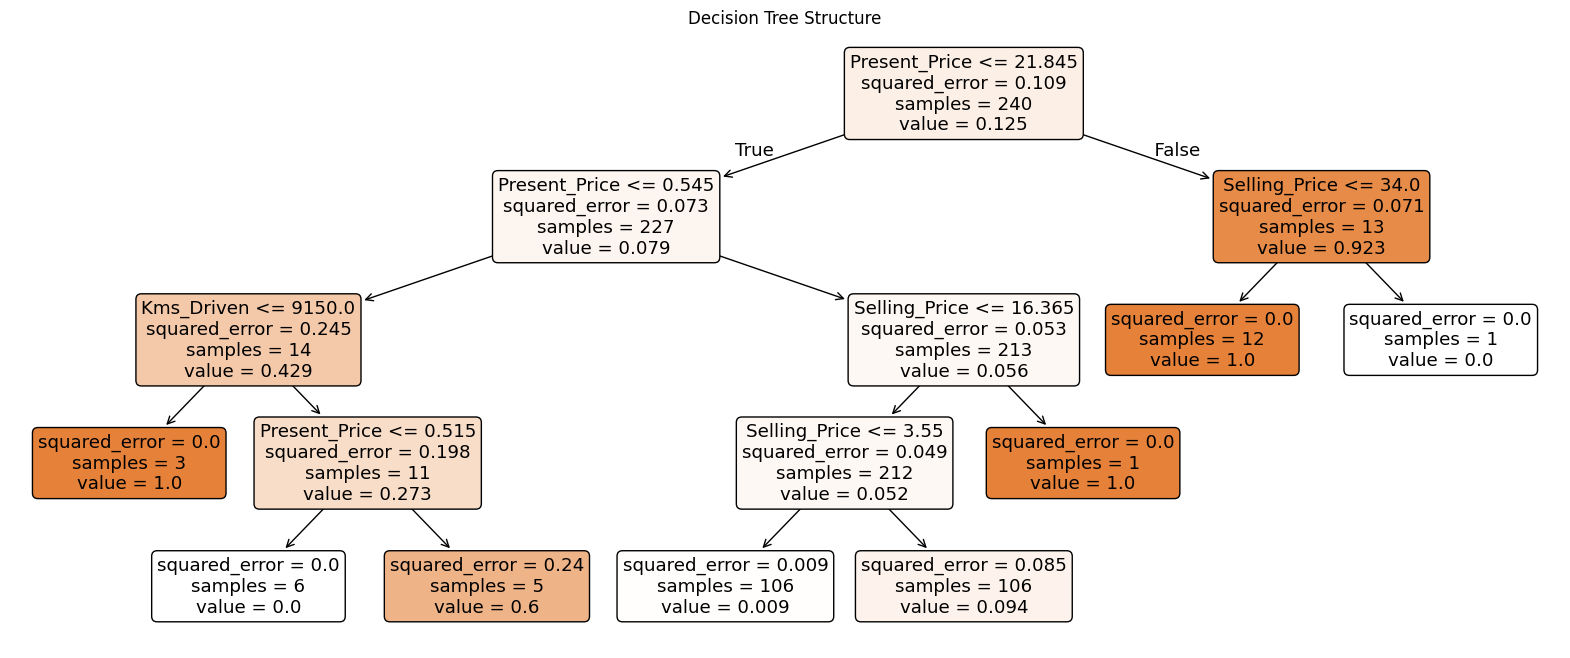

In [132]:


plt.figure(figsize=(20, 8))
plot_tree(tree_reg, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


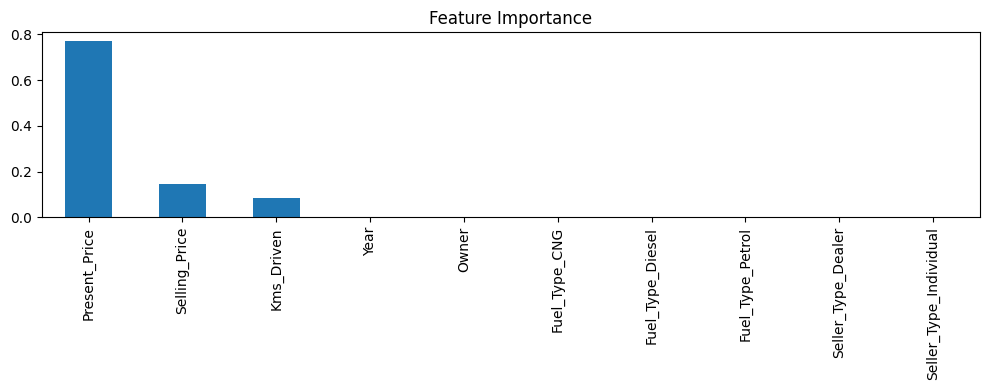

In [133]:
import pandas as pd
feat_importance = pd.Series(tree_reg.feature_importances_, index=X_train.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title="Feature Importance")
plt.tight_layout()
plt.show()

## 📊 K-Means Clustering

In [134]:
df_encouded.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [135]:
features = ['Present_Price', 'Kms_Driven', 'Year']

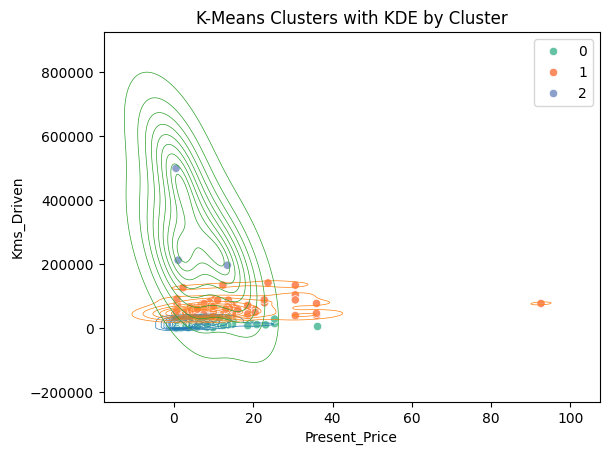

In [136]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select numeric features to cluster on
X_kmeans = df_encouded[features]

# Step 2: Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_encouded['Cluster'] = kmeans.fit_predict(X_kmeans)


# Step 3: Plot clusters
# plt.figure(figsize=(8, 5))
for cluster_id in df_encouded['Cluster'].unique():
    sns.kdeplot(
        data=df_encouded[df_encouded['Cluster'] == cluster_id],
        x='Present_Price',
        y='Kms_Driven',
        linewidths=0.5,
        # fill=True,
        # common_norm=False,
        # alpha=0.3,
        # linewidth=1,
        # label=f"Cluster {cluster_id}"
    )

# Add the scatter plot last
sns.scatterplot(data=df_encouded, x='Present_Price', y='Kms_Driven', hue='Cluster', palette='Set2')
plt.title('K-Means Clusters with KDE by Cluster')
plt.legend()
plt.show()

## 🧠 Neural Network (Manual Forward Pass)

# 📉 Evaluation

## 📏 Classification Metrics

✅ Classification Metrics
Accuracy  : 80.00%
Precision : 80.00%
Recall    : 80.00%
F1 Score  : 80.00%
MCC       : 0.600
ROC AUC   : 0.960
Log Loss  : 0.351


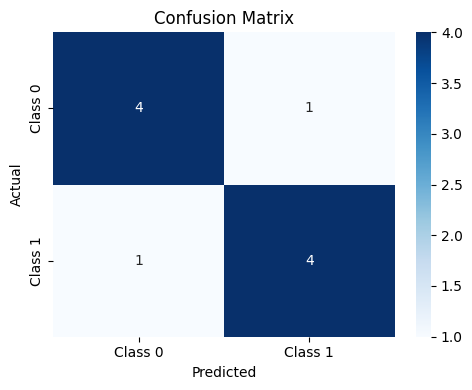


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.80      0.80         5
     Class 1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [138]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, log_loss, matthews_corrcoef
)
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 🎯 Fake binary classification data
# -------------------------------
y_true = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])
y_pred = np.array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0])
y_proba = np.array([0.1, 0.9, 0.2, 0.4, 0.3, 0.8, 0.9, 0.7, 0.95, 0.2])  # Probabilities for class 1

labels = ['Class 0', 'Class 1']

# -------------------------------
# 🧮 Metrics
# -------------------------------
print("✅ Classification Metrics")
print(f"Accuracy  : {accuracy_score(y_true, y_pred):.2%}")
print(f"Precision : {precision_score(y_true, y_pred):.2%}")
print(f"Recall    : {recall_score(y_true, y_pred):.2%}")
print(f"F1 Score  : {f1_score(y_true, y_pred):.2%}")
print(f"MCC       : {matthews_corrcoef(y_true, y_pred):.3f}")
print(f"ROC AUC   : {roc_auc_score(y_true, y_proba):.3f}")
print(f"Log Loss  : {log_loss(y_true, y_proba):.3f}")

# -------------------------------
# 📊 Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# -------------------------------
# 📄 Full Report
# -------------------------------
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


## 📊 Regression Metrics

# 🧼 Export & Save

## 💾 Save DataFrame

## 🧾 Export Model with joblib or pickle